In [5]:
# Created by Abhishek T - 2016-09-26
# updated in 2021 to support Python 3
# This is my playground for Python code to analyze stock trading information
# Implemented features:
# - Acquire DLB stocks from Yahoo Finance and Google Finance
# - Plot history
# - Candlestick plots (using Bokeh)
# Todo:
# Moving averages, gradients
# Machine learning goodness
#

import pandas
import pandas_datareader.data as web

import matplotlib.pyplot as plt 
import pylab

from bokeh.plotting import figure as bfigure 
from bokeh.plotting import show as bshow 
from bokeh.plotting import output_notebook

from datetime import datetime 
from math import pi

In [6]:
start = datetime(2020,1,1) # change the dates here as required
end = datetime.now()

In [8]:
dlby = web.DataReader("DLB", "yahoo", start, end) 
print(dlby.head())

                 High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2020-01-02  69.470001  68.089996  69.160004  69.459999  315900.0  68.099899
2020-01-03  69.459999  68.430000  68.500000  69.430000  335800.0  68.070496
2020-01-06  69.250000  68.620003  68.889999  69.010002  558300.0  67.658722
2020-01-07  69.160004  68.540001  69.160004  69.059998  248700.0  67.707718
2020-01-08  69.239998  68.360001  68.930000  68.610001  308400.0  67.266541


In [9]:
%matplotlib inline
%pylab inline 
pylab.rcParams['figure.figsize'] = (10,6)

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['pi', 'datetime', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


<AxesSubplot:xlabel='Date'>

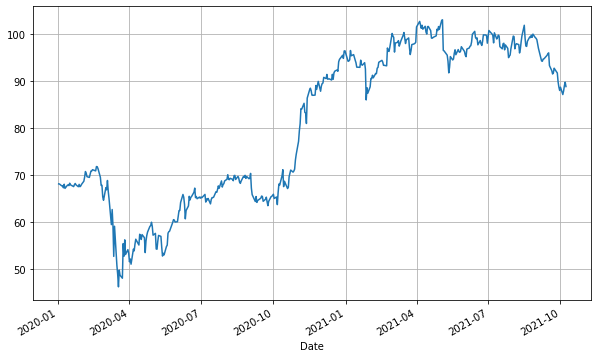

In [10]:
dlby["Adj Close"].plot(grid=True)

In [11]:
dlby.describe()

,High,Low,Open,Close,Volume,Adj Close
count,447.000000,447.000000,447.000000,447.000000,4.470000e+02,447.000000
mean,81.927248,80.176398,81.065459,81.083199,4.513591e+05,80.462145
std,16.252953,16.238696,16.283995,16.219205,2.263047e+05,16.473835
min,47.910000,44.680000,46.430000,46.939999,9.510000e+04,46.162369
25%,67.279999,65.820000,66.639999,66.480000,2.992000e+05,65.821350
50%,88.959999,86.720001,87.570000,87.620003,3.927000e+05,87.007156
75%,97.660004,95.945000,96.994999,96.879997,5.339000e+05,96.472645
max,104.739998,102.089996,103.050003,103.529999,1.737300e+06,103.054253


In [12]:
output_notebook()

Loading BokehJS ...

In [13]:
df = pandas.DataFrame(dlby)[-50:]

In [14]:
print(df.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [15]:
print(df.index.name, df.index)

Date DatetimeIndex(['2021-07-30', '2021-08-02', '2021-08-03', '2021-08-04',
               '2021-08-05', '2021-08-06', '2021-08-09', '2021-08-10',
               '2021-08-11', '2021-08-12', '2021-08-13', '2021-08-16',
               '2021-08-17', '2021-08-18', '2021-08-19', '2021-08-20',
               '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
               '2021-08-27', '2021-08-30', '2021-08-31', '2021-09-01',
               '2021-09-02', '2021-09-03', '2021-09-07', '2021-09-08',
               '2021-09-09', '2021-09-10', '2021-09-13', '2021-09-14',
               '2021-09-15', '2021-09-16', '2021-09-17', '2021-09-20',
               '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24',
               '2021-09-27', '2021-09-28', '2021-09-29', '2021-09-30',
               '2021-10-01', '2021-10-04', '2021-10-05', '2021-10-06',
               '2021-10-07', '2021-10-08'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [16]:
df['date'] = pandas.to_datetime(df.index)
print(df['date'].head())

Date
2021-07-30   2021-07-30
2021-08-02   2021-08-02
2021-08-03   2021-08-03
2021-08-04   2021-08-04
2021-08-05   2021-08-05
Name: date, dtype: datetime64[ns]


In [17]:
# Use Bokeh.js to generate a Candlestick plot for the last 50 days
mids = (df['Open'] + df['Close'])//2 
spans = abs(df['Close'] - df['Open'])

In [18]:
inc = df['Close'] > df['Open'] 
dec = df['Open'] > df['Close']
w = 12*60*60*1000 # half day in ms

In [22]:
TOOLS = "pan,wheel_zoom,box_zoom,reset,save"
p = bfigure(x_axis_type="datetime", tools=TOOLS, plot_width=800, plot_height=500, title="DLB Candlestick")
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

In [23]:
p.segment(df.date, df.High, df.date, df.Low, color='black')
p.rect(df.date[inc], mids[inc], w, spans[inc], fill_color="#D5E1DD", line_color="black")
p.rect(df.date[dec], mids[dec], w, spans[dec], fill_color="#F2583E", line_color="black")

GlyphRenderer(id='1255', ...)

In [24]:
bshow(p) # show the candlestick plot